<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Classification_Metrics_(CM)%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V


Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 41.2MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
print(demo1.iloc[0].text)

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [5]:
print(demo1.iloc[3].text)

Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin



In [19]:
demo1['label_num'].value_counts()/ len(demo1)

,count
label_num,
0,0.710114
1,0.289886


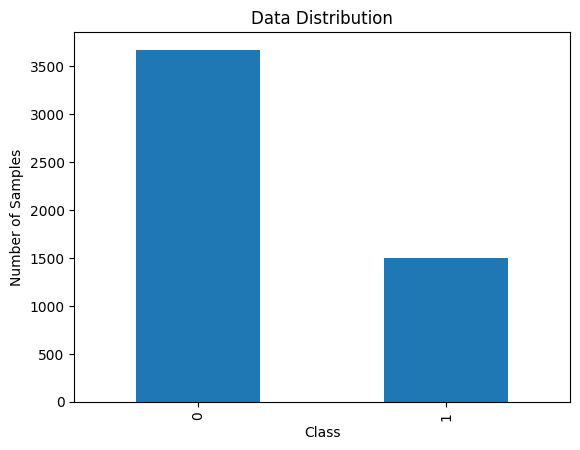

In [18]:
demo1['label_num'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Data Distribution')
plt.show()

In [8]:
demo1.shape

(5171, 2)

- CountVectorizer
- tf-idf Vectorizer
- embeddings:
    - Pre-trained/sementic
    - contextual


In [9]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 72.0MB/s]


In [11]:
dt = pd.read_csv('Spam_finalData.csv')
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [12]:
dt.shape

(5171, 16)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])


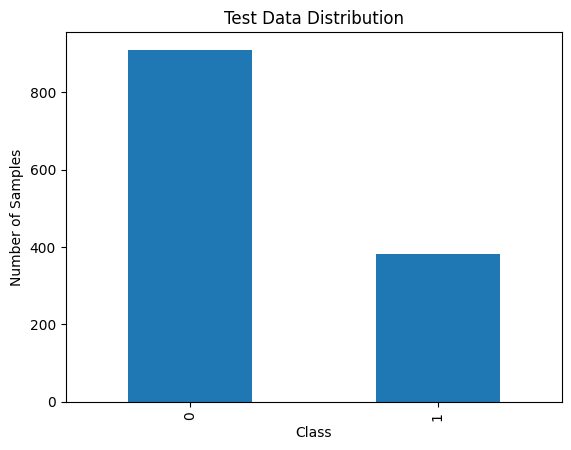

In [14]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)
print('Model Accuracy:', model.score(X_train, y_train))

print('Model Accuracy:', model.score(X_test, y_test))


Model Accuracy: 0.9303764827230531
Model Accuracy: 0.9350348027842227


In [20]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cf = confusion_matrix(y_test,y_pred)
cf

array([[847,  63],
       [ 21, 362]])

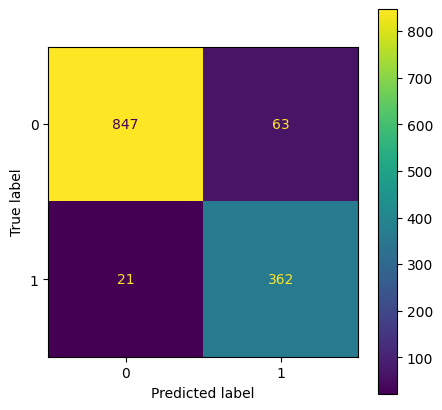

In [24]:
from matplotlib import pyplot as plt

# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(cf).plot(ax = ax)


1. How accurate was our model when it predicts Class 1

2. How many actual class 1's it got right

In [25]:
cf

array([[847,  63],
       [ 21, 362]])

In [26]:
cf.sum()

np.int64(1293)

In [28]:
(cf[0][0] + cf[1][1])/cf.sum()

np.float64(0.9350348027842227)

In [29]:
np.diag(cf).sum()/cf.sum()

np.float64(0.9350348027842227)

### Write fucntion to calculate p and r given confuion matrix as input

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       910
           1       0.85      0.95      0.90       383

    accuracy                           0.94      1293
   macro avg       0.91      0.94      0.92      1293
weighted avg       0.94      0.94      0.94      1293



In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Precision: 0.851764705882353
Recall: 0.9451697127937336
F1 Score: 0.8960396039603961
